***Assignment #9 - Reinforcement Learning***

*Pendulum Problem - Hanging Around*

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/18_reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/18_reinforcement_learning.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

In [ ]:

import numpy as np
import sys
assert sys.version_info >= (3, 7)
import numpy as np
import gym

from packaging import version
import tensorflow as tf
assert version.parse(tf.__version__) >= version.parse("2.8.0")


/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('animation', html='jshtml')

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "rl"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. Neural nets can be very slow without a GPU.")
    if "google.colab" in sys.modules:
        print("Go to Runtime > Change runtime and select a GPU hardware "
              "accelerator.")
    if "kaggle_secrets" in sys.modules:
        print("Go to Settings > Accelerator and select GPU.")

In [ ]:
if "google.colab" in sys.modules or "kaggle_secrets" in sys.modules:
    %pip install -q -U gym
    %pip install -q -U gym[classic_control,box2d,atari,accept-rom-license]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.6 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 28.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 49.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wh

In [ ]:
env = gym.make("Pendulum-v1", render_mode="rgb_array")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  def step(self, action: ActType) -> Tuple[ObsType, float, bool, bool, dict]:
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  self.output_truncation_bool = output_truncation_bool


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:137: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'tuple'>
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:226: UserWarning: WARN: Casting input x to numpy array.
  if not isinstance(x, np.ndarray):
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:167: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space with exception: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.
  logger.warn(f"{pre} is not within the observation space 

[ 0.9851665   0.17160118 -0.47657657]


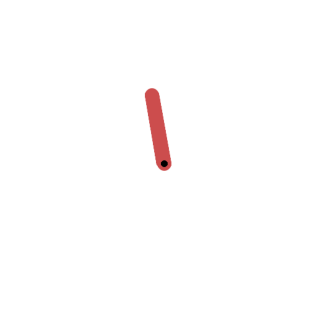

Box(-2.0, 2.0, (1,), float32)

In [ ]:
obs, info = env.reset()
print(obs)
img = env.render()

# height, width, channels (3 = Red, Green, Blue)# extra code – creates a little function to render and plot an environment
def plot_environment(env, figsize=(5, 4)):
    plt.figure(figsize=figsize)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    return img

plot_environment(env)
plt.show()

env.action_space

NOTE: The action in the Pendulum environment is a single float value in the range of (-2.0,2.0) representing a torque applied to the end of the pendulum

In [ ]:
def basic_policy(obs):
  angle = -180/np.pi*np.arctan2(obs[0],obs[1]) + 90
  if angle > 180: angle -= 360
  ang_vel = 180/np.pi*obs[2]
  # if within 45 degrees of top exert proportional control towards top
  if angle == 0:
    torque = -ang_vel
  elif abs(angle) <= 90: # in top half
    torque = -(90-abs(angle))*ang_vel/90
  else:
    torque = 1.5 * (ang_vel/abs(ang_vel)) * abs(angle)/90

  action = np.array((torque,))

  return action

Text(0, 0.5, 'angular velocity - range [-8,8]')

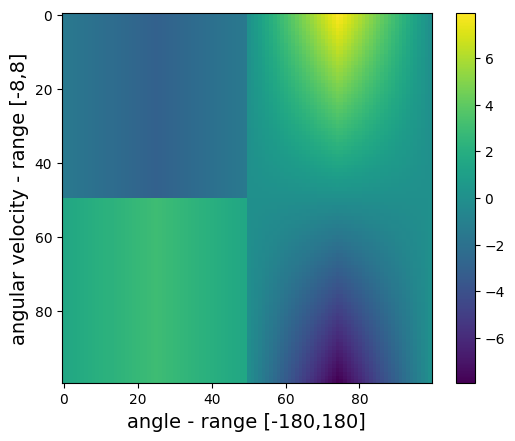

In [ ]:
# visualize policy
# x - axis is angle, y- axis is ang. velocity, z-value is our torque action

angles,ang_vels = np.meshgrid(np.linspace(-180,180,100),np.linspace(-8,8,100))
orig_shape = angles.shape
angles = angles.flatten()
ang_vels = ang_vels.flatten()
action_space = np.zeros(angles.shape)

n = 0
for angle,ang_vel in zip(angles,ang_vels):
  fake_obs = np.array([np.cos((angle-90)*np.pi/180),np.sin((angle-90)*np.pi/180),ang_vel*np.pi/180,0])
  action_space[n] = basic_policy(fake_obs)
  n += 1

action_space = action_space.reshape(orig_shape)

plt.figure()
plt.imshow(action_space)
plt.colorbar()
plt.xlabel('angle - range [-180,180]')
plt.ylabel('angular velocity - range [-8,8]')



In [ ]:
totals = []
for episode in range(1):
    episode_rewards = 0
    obs, info = env.reset(seed=episode)
    for step in range(10):#200):
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)

print(totals)
np.mean(totals), np.std(totals), min(totals), max(totals)

[-17.221720609896014]


(-17.221720609896014, 0.0, -17.221720609896014, -17.221720609896014)

In [ ]:
# extra code – this cell displays an animation of one episode

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = matplotlib.animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

def show_one_episode(policy, n_max_steps=200, seed=42):
    frames = []
    env = gym.make("Pendulum-v1", render_mode="rgb_array")
    np.random.seed(seed)
    obs, info = env.reset(seed=seed)
    for step in range(n_max_steps):
        frames.append(env.render())
        action = policy(obs)
        obs, reward, done, info = env.step(action)
        if done:
            break
    env.close()
    return plot_animation(frames)

show_one_episode(basic_policy)

# Neural Network Policies

In [ ]:
def play_one_step(env, obs, model, loss_fn):
    theta = np.arctan2(obs[0],obs[1])
    theta_dt = obs[2]
    with tf.GradientTape() as tape:
        action = 2 * model(obs[np.newaxis])
        reward = -(theta**2 + 0.1 * theta_dt**2 + 0.001 * action[0]**2)

    grads = tape.gradient(reward, model.trainable_variables)
    obs, reward, done, info = env.step(action)
    return obs, reward, done, grads

In [ ]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs, info = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, grads = play_one_step(
                env, obs, model, loss_fn)
            current_rewards.append(reward)
            current_grads.append(grads)
            if done:
                break

        all_rewards.append(current_rewards)
        all_grads.append(current_grads)

    return all_rewards, all_grads

In [ ]:
def discount_rewards(rewards, discount_factor):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_factor
    return discounted

def discount_and_normalize_rewards(all_rewards, discount_factor):
    all_discounted_rewards = [discount_rewards(rewards, discount_factor)
                              for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / reward_std
            for discounted_rewards in all_discounted_rewards]

In [ ]:
n_iterations = 5
n_episodes_per_update = 10
n_max_steps = 200
discount_factor = 0.95

In [ ]:
# extra code – let's create the neural net and reset the environment, for
#              reproducibility

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(1, activation="tanh"),
])

obs, info = env.reset(seed=42)

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = tf.keras.losses.mean_absolute_error

In [ ]:
for iteration in range(n_iterations):
    all_rewards, all_grads = play_multiple_episodes(env, n_episodes_per_update, n_max_steps, model, loss_fn)

    # extra code – displays some debug info during training
    total_rewards = sum(map(sum, all_rewards))
    print(f"\rIteration: {iteration + 1}/{n_iterations},",
          f" mean rewards: {total_rewards / n_episodes_per_update}", end="")

    all_final_rewards = discount_and_normalize_rewards(all_rewards,
                                                       discount_factor)
    all_mean_grads = []
    for var_index in range(len(model.trainable_variables)):
        mean_grads = tf.reduce_mean(
            [final_reward * all_grads[episode_index][step][var_index]
             for episode_index, final_rewards in enumerate(all_final_rewards)
                 for step, final_reward in enumerate(final_rewards)], axis=0)
        all_mean_grads.append(mean_grads)

    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

Iteration: 5/5,  mean rewards: [-1188.4125]

In [ ]:
def pg_policy(obs):
    pred = 2 * model.predict(obs[np.newaxis], verbose=0)
    #print(pred.shape)
    return pred[0]

In [ ]:
# extra code – displays the animation
np.random.seed(42)
show_one_episode(pg_policy)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  def step(self, action: ActType) -> Tuple[ObsType, float, bool, bool, dict]:
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  self.output_truncation_bool = output_truncation_bool
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_c

# Policy Gradients

Text(0, 0.5, 'angular velocity - range [-8,8]')

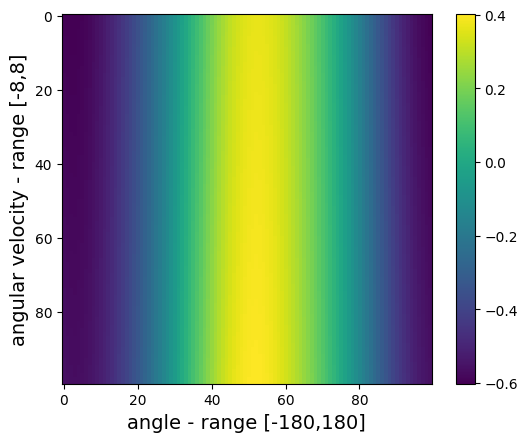

In [ ]:
# visualize policy
# x - axis is angle, y- axis is ang. velocity, z-value is our torque action

angles,ang_vels = np.meshgrid(np.linspace(-180,180,100),np.linspace(-8,8,100))
orig_shape = angles.shape
angles = angles.flatten()
ang_vels = ang_vels.flatten()
action_space = np.zeros(angles.shape)

n = 0
for angle,ang_vel in zip(angles,ang_vels):
  fake_obs = np.array([np.cos((angle-90)*np.pi/180),np.sin((angle-90)*np.pi/180),ang_vel*np.pi/180])
  action_space[n] = pg_policy(fake_obs)
  n += 1

action_space = action_space.reshape(orig_shape)

plt.figure()
plt.imshow(action_space)
plt.colorbar()
plt.xlabel('angle - range [-180,180]')
plt.ylabel('angular velocity - range [-8,8]')